In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Data Preparation and Initial Analysis

In [2]:
# Read the NBA MVP statistics data into a DataFrame
stats = pd.read_csv("C:/Users/stask/Desktop/Break into IT/SQL learning/NBA MVP Forecast & Analytics/player_mvp_stats.csv", index_col=0)
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73


In [3]:
# Check for missing values in the DataFrame and display the count of missing values for each column
pd.isnull(stats).sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          61
3P            0
3PA           0
3P%        2102
2P            0
2PA           0
2P%         105
eFG%         61
FT            0
FTA           0
FT%         545
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [4]:
stats[pd.isnull(stats["3P%"])][["Player", "3PA",'Year']].head()

,Player,3PA,Year
2,Elden Campbell,0.0,1991
3,Irving Thomas,0.0,1991
18,Jack Haley,0.0,1992
20,Keith Owens,0.0,1992
30,Benoit Benjamin,0.0,1993


In [5]:
stats[pd.isnull(stats["FT%"])][["Player", "FTA"]].head()

,Player,FTA
77,John Coker,0.0
92,Jason Sasser,0.0
103,Adrian Caldwell,0.0
119,Bruno Е undov,0.0
158,Jamal Robinson,0.0


In [6]:
# Fill missing values in the DataFrame with zeros
stats = stats.fillna(0)

In [7]:
# Define replacements
replacements = {
    "Luka DonДЌiД‡": "Luka Doncic",
    "Nikola JokiД‡": "Nikola Jokic"
}
stats['Player'].replace(replacements, inplace=True)

# Part 2: Data Splitting for Training and Testing

In [8]:
# Define the list of predictor variables
predictors = ["Age", "G", "GS", "MP", "FG", "FGA", 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W', 'L', 'W/L%',
       'GB', 'PS/G', 'PA/G', 'SRS']

In [9]:
# Create training and testing datasets based on the year
train = stats[~(stats["Year"] == 2023)]
test = stats[stats["Year"] == 2023]
print(train.shape, test.shape)

(14697, 41) (539, 41)


# Part 3: Model Training and Prediction

In [10]:
# Import the Ridge regression model from scikit-learn
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [11]:
# Fit the model on the training data
reg.fit(train[predictors],train["Share"])

Ridge(alpha=0.1)

In [12]:
# Make predictions on the testing data
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
predictions

,predictions
211,0.003184
212,0.031703
213,0.042324
214,0.225694
215,0.000021
...,...
15111,-0.012346
15112,0.004314
15113,-0.014854
15114,0.019197


In [13]:
# Combine the testing data, actual MVP shares, and predictions into a single DataFrame
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
combination.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
14849,Joel Embiid,0.915,0.202730
736,Nikola Jokic,0.674,0.173181
214,Giannis Antetokounmpo,0.606,0.225694
2898,Jayson Tatum,0.280,0.136305
1322,Shai Gilgeous-Alexander,0.046,0.150951
13682,Donovan Mitchell,0.030,0.087769
4274,Domantas Sabonis,0.027,0.092824
306,Luka Doncic,0.010,0.194363
6686,Stephen Curry,0.005,0.106164
10869,Jimmy Butler,0.003,0.112081


# Part 4: Model Evaluation and Backtesting

In [14]:
# Import the mean squared error metric from scikit-learn
from sklearn.metrics import mean_squared_error

mean_squared_error(combination["Share"], combination["predictions"])

0.002660192907944293

In [15]:
combination["Share"].value_counts()

0.000    526
0.001      2
0.606      1
0.010      1
0.674      1
0.046      1
0.280      1
0.002      1
0.027      1
0.005      1
0.003      1
0.030      1
0.915      1
Name: Share, dtype: int64

In [16]:
# Add rank columns to both actual and predicted DataFrames
actual = combination.sort_values("Share", ascending=False)
predicted = combination.sort_values("predictions", ascending=False)
actual["Rk"] = list(range(1,actual.shape[0]+1))
predicted["Predicted_Rk"] = list(range(1,predicted.shape[0]+1))

In [17]:
actual.merge(predicted, on="Player").head(5)

,Player,Share_x,predictions_x,Rk,Share_y,predictions_y,Predicted_Rk
0,Joel Embiid,0.915,0.202730,1,0.915,0.202730,2
1,Nikola Jokic,0.674,0.173181,2,0.674,0.173181,4
2,Giannis Antetokounmpo,0.606,0.225694,3,0.606,0.225694,1
3,Jayson Tatum,0.280,0.136305,4,0.280,0.136305,9
4,Shai Gilgeous-Alexander,0.046,0.150951,5,0.046,0.150951,5


In [18]:
# Define a function to calculate the Average Precision (AP)
def find_ap(combination):
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    return sum(ps) / len(ps)

In [19]:
# Display the AP as an error metric for the top 5 MVP predictions
ap = find_ap(combination)
ap

0.821111111111111

In [20]:
# Create a list of years for backtesting
years = list(range(1991,2024))

In [21]:
# Initialize lists to store AP values and all prediction DataFrames
aps = []
all_predictions = []

# Loop through each year for backtesting
for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[predictors], train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))
aps

[0.47000000000000003,
 0.3922012578616352,
 0.8102564102564103,
 0.3871428571428571,
 0.8392857142857142,
 0.9266666666666665,
 0.6835164835164835,
 0.9666666666666666,
 0.6899267399267399,
 0.563498817966903,
 0.4071008403361344,
 0.6434782608695653,
 0.7683333333333333,
 0.9428571428571428,
 0.8142857142857143,
 0.7392857142857142,
 0.40535714285714286,
 0.6976190476190476,
 0.6341698841698842,
 0.9266666666666665,
 0.8333333333333333,
 0.8111111111111111,
 0.7909090909090909,
 0.6375757575757576,
 0.9428571428571428,
 0.7636363636363636,
 0.8225,
 0.821111111111111]

In [22]:
# Calculate the mean AP as a measure of model performance in backtesting
mean_ap = sum(aps) / len(aps)

# Display the mean AP
mean_ap

0.7189767597180119

In [23]:
# Define a function to add rank columns to a DataFrame
def add_ranks(predictions):
    predictions = predictions.sort_values("predictions", ascending=False)
    predictions["Predicted_Rk"] = list(range(1,predictions.shape[0]+1))
    predictions = predictions.sort_values("Share", ascending=False)
    predictions["Rk"] = list(range(1,predictions.shape[0]+1))
    predictions["Diff"] = (predictions["Rk"] - predictions["Predicted_Rk"])
    return predictions

In [24]:
add_ranks(all_predictions[1])

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1817,Karl Malone,0.857,0.192360,2,1,-1
11360,Michael Jordan,0.832,0.167672,3,2,-1
1043,Grant Hill,0.327,0.128664,6,3,-3
5151,Tim Hardaway,0.207,0.059992,20,4,-16
9009,Glen Rice,0.117,0.033122,53,5,-48
...,...,...,...,...,...,...
10972,Horacio Llamas,0.000,0.010225,156,437,281
3929,Ennis Whatley,0.000,0.010287,155,438,283
11430,Kevin Salvadori,0.000,0.010594,154,439,285
1355,Aaron Williams,0.000,0.010608,153,440,287


In [25]:
# Define a function for backtesting the model over multiple years
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [26]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)
mean_ap

0.7189767597180119

In [27]:
# Display the top 10 predictions with the largest rank differences
all_predictions[all_predictions["Rk"] < 5].sort_values("Diff").head(10)

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1441,Jason Kidd,0.712,0.027957,52,2,-50
5674,Steve Nash,0.839,0.032686,47,1,-46
9277,Peja StojakoviД‡,0.228,0.035581,39,4,-35
5692,Steve Nash,0.739,0.051338,35,1,-34
13800,Joakim Noah,0.258,0.047390,37,4,-33
5707,Steve Nash,0.785,0.070791,23,2,-21
5151,Tim Hardaway,0.207,0.059992,20,4,-16
980,Devin Booker,0.216,0.092999,16,4,-12
7330,Kobe Bryant,0.291,0.077829,14,4,-10
1374,Gary Payton,0.372,0.076145,13,3,-10


In [28]:
# Concatenate the coefficient values and corresponding predictor names and sort them by coefficient value in descending order
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
13,0.099448,eFG%
18,0.032759,DRB
28,0.028856,W/L%
17,0.020541,ORB
10,0.016192,2P
21,0.012445,STL
22,0.010485,BLK
15,0.010386,FTA
12,0.007650,2P%
25,0.006978,PTS


In [29]:
# Calculate stat ratios for selected statistics and group them by year
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())
# Add ratio columns to the DataFrame
stats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W/L%,GB,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.707,5.0,106.3,99.6,6.73,1.013334,0.420714,0.961127,0.673469,0.508587
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.707,5.0,106.3,99.6,6.73,1.614653,1.028412,1.647646,0.673469,4.577279
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.707,5.0,106.3,99.6,6.73,0.311795,0.093492,0.274608,1.571429,0.000000
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.707,5.0,106.3,99.6,6.73,0.200440,0.186984,0.274608,0.000000,0.000000
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.707,5.0,106.3,99.6,6.73,2.383005,1.636110,1.784950,0.897959,1.525760


In [30]:
# Add the new ratio predictors to the list of predictors
predictors += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [31]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [32]:
mean_ap

0.7251721336449322

In [33]:
# Encode categorical variables "Pos" and "Tm" as numeric codes
stats["NPos"] = stats["Pos"].astype("category").cat.codes
stats["NTm"] = stats["Tm"].astype("category").cat.codes
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,106.3,99.6,6.73,1.013334,0.420714,0.961127,0.673469,0.508587,2,15
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,106.3,99.6,6.73,1.614653,1.028412,1.647646,0.673469,4.577279,12,15
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,106.3,99.6,6.73,0.311795,0.093492,0.274608,1.571429,0.000000,2,15
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,106.3,99.6,6.73,0.200440,0.186984,0.274608,0.000000,0.000000,2,15
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,106.3,99.6,6.73,2.383005,1.636110,1.784950,0.897959,1.525760,8,15


In [34]:
# Import the Random Forest Regressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)

In [35]:
# Perform backtesting using the Random Forest Regressor model with additional predictors
mean_ap_rf, aps_rf, all_predictions_rf = backtest(stats, rf, years[32:], predictors + ["NPos", "NTm"])
# Display the mean AP with the Random Forest Regressor model
mean_ap_rf

0.8583333333333332

In [36]:
all_predictions_rf.head()

,Player,Share,predictions,Predicted_Rk,Rk,Diff
14849,Joel Embiid,0.915,0.534890,3,1,-2
736,Nikola Jokic,0.674,0.179373,8,2,-6
214,Giannis Antetokounmpo,0.606,0.665780,1,3,2
2898,Jayson Tatum,0.280,0.623503,2,4,2
1322,Shai Gilgeous-Alexander,0.046,0.189172,6,5,-1


In [37]:
# Perform backtesting using the Ridge regression model with additional predictors (excluding encoded variables)
mean_ap_reg, aps_reg, all_predictions_reg = backtest(stats, reg, years[32:], predictors)
# Display the mean AP with additional predictors (excluding encoded variables)
mean_ap_reg

0.7595238095238095

In [44]:
all_predictions_reg.head()

,Player,Share,predictions,Predicted_Rk,Rk,Diff
14849,Joel Embiid,0.915,0.166366,3,1,-2
736,Nikola Jokic,0.674,0.147684,4,2,-2
214,Giannis Antetokounmpo,0.606,0.200305,1,3,2
2898,Jayson Tatum,0.280,0.117301,6,4,-2
1322,Shai Gilgeous-Alexander,0.046,0.115577,7,5,-2


In [47]:
# Filter the DataFrame for the year 2023 and select the top 10 players with the largest 'Share' values
top_10_2023 = all_predictions_rf.head(10)[['Player','Share','Rk']]
top_10_2023

,Player,Share,Rk
14849,Joel Embiid,0.915,1
736,Nikola Jokic,0.674,2
214,Giannis Antetokounmpo,0.606,3
2898,Jayson Tatum,0.280,4
1322,Shai Gilgeous-Alexander,0.046,5
13682,Donovan Mitchell,0.030,6
4274,Domantas Sabonis,0.027,7
306,Luka Doncic,0.010,8
6686,Stephen Curry,0.005,9
10869,Jimmy Butler,0.003,10


In [48]:
# top 100 for 2023 linear regression
top_100_2023_reg = all_predictions_reg.nsmallest(100, 'Predicted_Rk')[['Player', 'predictions', 'Predicted_Rk']]

# Rename the columns 'Predicted_Rk' to 'Rank_reg' and 'predictions' to 'Share_reg' in the DataFrame
top_100_2023_reg.rename(columns={'Predicted_Rk': 'Rank_reg', 'predictions': 'Share_reg'}, inplace=True)
top_100_2023_reg

,Player,Share_reg,Rank_reg
214,Giannis Antetokounmpo,0.200305,1
306,Luka Doncic,0.170290,2
14849,Joel Embiid,0.166366,3
736,Nikola Jokic,0.147684,4
8083,Damian Lillard,0.118129,5
...,...,...,...
13687,Jarrett Allen,0.013168,96
14143,Fred VanVleet,0.013116,97
425,Donovan Williams,0.013019,98
4124,Malcolm Hill,0.012459,99


In [49]:
# top 100 for 2023 random forest
top_100_2023_rf = all_predictions_rf.nsmallest(100,'Predicted_Rk')[['Player','predictions','Predicted_Rk']]
# Rename the columns 'Predicted_Rk' to 'Rank_reg' and 'predictions' to 'Share_reg' in the DataFrame
top_100_2023_rf.rename(columns={'Predicted_Rk': 'Rank_rf', 'predictions': 'Share_rf'}, inplace=True)
top_100_2023_rf

,Player,Share_rf,Rank_rf
214,Giannis Antetokounmpo,0.665780,1
2898,Jayson Tatum,0.623503,2
14849,Joel Embiid,0.534890,3
2897,Jaylen Brown,0.256080,4
306,Luka Doncic,0.253167,5
...,...,...,...
14521,Jordan Clarkson,0.000005,96
8668,Anthony Gill,0.000000,97
8673,Deni Avdija,0.000000,98
8672,Delon Wright,0.000000,99


#  Part 5: Predictions Visualization

In [50]:
# Merge the three datasets on the "Player" column
merged_data = pd.merge(top_100_2023_rf, top_100_2023_reg, on="Player", how='outer')
merged_data = pd.merge(merged_data, top_10_2023, on="Player")\
    .rename(columns={'Rk':'Rank'})\
    .reset_index(drop=True)\
    .set_index('Player')\
    .sort_values('Rank')[['Share','Rank','Share_rf','Rank_rf','Share_reg','Rank_reg']]
merged_data

,Share,Rank,Share_rf,Rank_rf,Share_reg,Rank_reg
Player,,,,,,
Joel Embiid,0.915,1,0.534890,3.0,0.166366,3.0
Nikola Jokic,0.674,2,0.179373,8.0,0.147684,4.0
Giannis Antetokounmpo,0.606,3,0.665780,1.0,0.200305,1.0
Jayson Tatum,0.280,4,0.623503,2.0,0.117301,6.0
Shai Gilgeous-Alexander,0.046,5,0.189172,6.0,0.115577,7.0
Donovan Mitchell,0.030,6,0.172311,9.0,0.067861,22.0
Domantas Sabonis,0.027,7,0.079013,15.0,0.077258,18.0
Luka Doncic,0.010,8,0.253167,5.0,0.170290,2.0
Stephen Curry,0.005,9,0.106829,13.0,0.092973,13.0


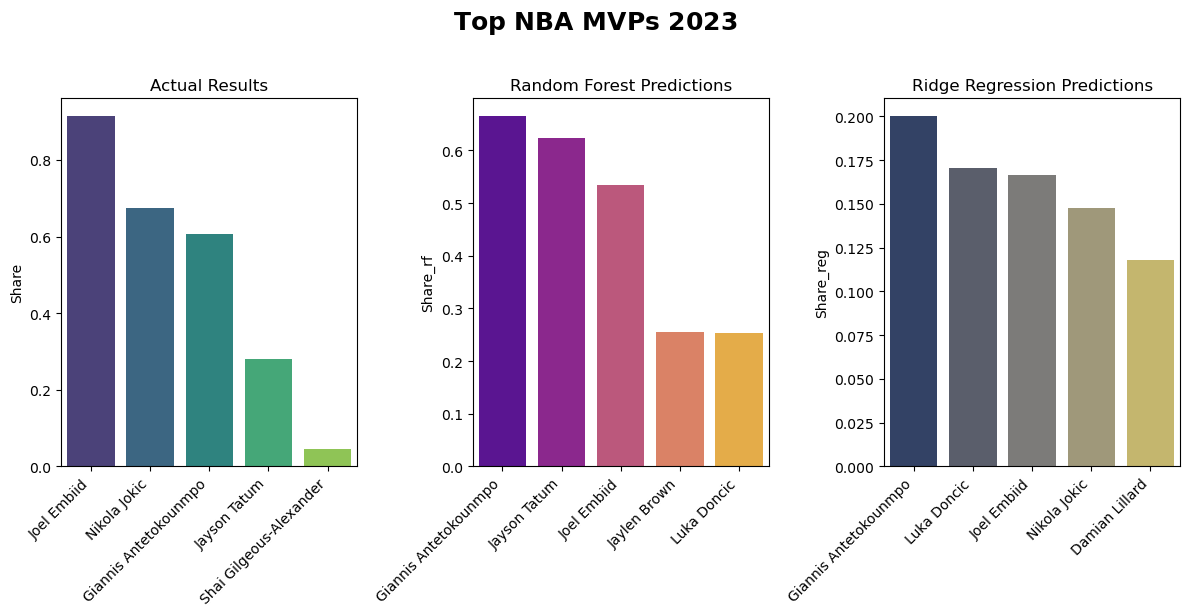

In [63]:
# Creating 3 subplots for top 5 players
top_5_2023 = top_10_2023.head()
top_5_2023_rf = top_100_2023_rf.head()
top_5_2023_reg = top_100_2023_reg.head()

# Set the figure size
plt.figure(figsize=(12, 6))

# Add a super title with enhanced styling
plt.suptitle(r'$\bf{Top\ NBA\ MVPs\ 2023}$', fontsize=18, fontweight='bold', y=1.02)

# Create the first horizontal bar plot for top_5_2023 with swapped axes and rotated labels
plt.subplot(131)
ax1 = sns.barplot(x="Player", y="Share", data=top_5_2023, palette="viridis")
plt.title('Actual Results')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_xlabel('')

# Create the second horizontal bar plot for top_5_2023_rf with swapped axes and rotated labels
plt.subplot(132)
ax2 = sns.barplot(x="Player", y="Share_rf", data=top_5_2023_rf, palette="plasma")
plt.title("Random Forest Predictions")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
ax2.set_xlabel('')

# Create the third horizontal bar plot for top_5_2023_reg with swapped axes and rotated labels
plt.subplot(133)
ax3 = sns.barplot(x="Player", y="Share_reg", data=top_5_2023_reg, palette="cividis")
plt.title("Ridge Regression Predictions")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')
ax3.set_xlabel('')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()